Exercitiul 1

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np

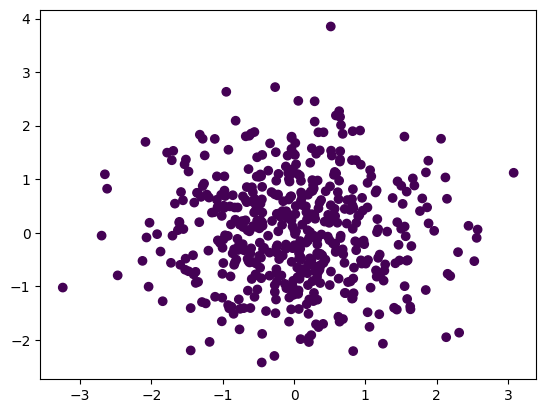

In [2]:
data = make_blobs(n_samples=500, n_features=2,centers=[[0,0]], cluster_std=1.0, random_state=42)
X, y = data
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [17]:
mean = (0,0)
cov = [[1,0],[0,1]]
projection_vectors = np.random.multivariate_normal(mean, cov, 5)
projection_vectors = projection_vectors / np.linalg.norm(projection_vectors)
projections = np.dot(X, projection_vectors.T)


In [18]:
def get_probabilities_list(bins=10):
    probabilities_list = []
    bin_edges_list = []
    for i in range(5):
        hist, bin_edges = np.histogram(projections[:, i], bins=bins, range=(-5, 5))
        probab = hist / len(projections)
        probabilities_list.append(probab)
        bin_edges_list.append(bin_edges)
    return probabilities_list, bin_edges_list

In [19]:
probabilities_list, bin_edges_list = get_probabilities_list()

In [20]:
def compute_anomaly_score(sample):
    sample_probs = []

    for i in range(5):
        projected_value = np.dot(sample, projection_vectors[i])

        bin_index = np.digitize(projected_value, bin_edges_list[i]) - 1

        sample_probability = probabilities_list[i][bin_index]
        sample_probs.append(sample_probability)

    mean_prob = np.mean(sample_probs)
    
    return 1-mean_prob

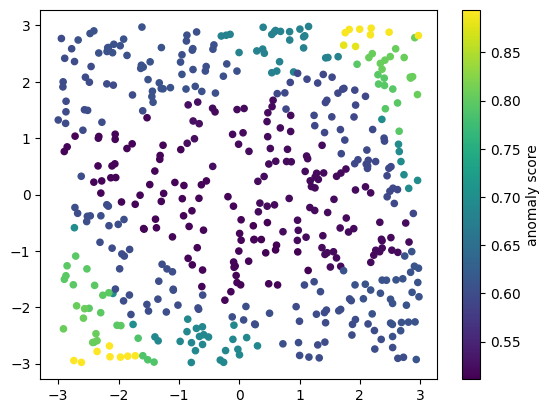

In [21]:
test_data = np.random.uniform(-3,3,(500, 2))
anomaly_scores = np.array([compute_anomaly_score(sample) for sample in test_data])

plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores, cmap='viridis', s=20)
plt.colorbar(label='anomaly score')
plt.show()

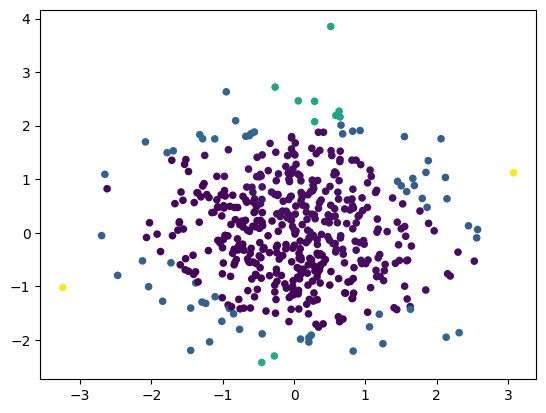

In [22]:
anomaly_scores_X = np.array([compute_anomaly_score(sample) for sample in X])

plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores_X, cmap='viridis', s=20)
plt.show()

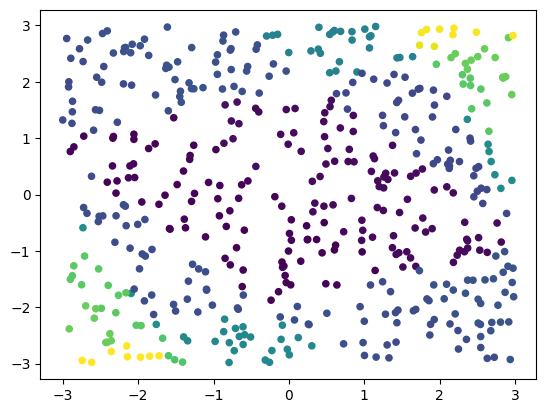

In [23]:
probabilities_list1, bin_edges_list1 = get_probabilities_list(bins=50)
anomaly_scores1 = np.array([compute_anomaly_score(sample) for sample in test_data])

plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores1, cmap='viridis', s=20)
plt.show()

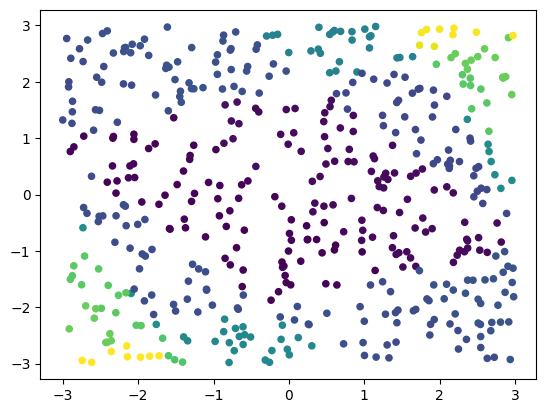

In [24]:
probabilities_list2, bin_edges_list2 = get_probabilities_list(bins=70)
anomaly_scores2 = np.array([compute_anomaly_score(sample) for sample in test_data])

plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores2, cmap='viridis', s=20)
plt.show()

Exercitiul 2

In [28]:
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA

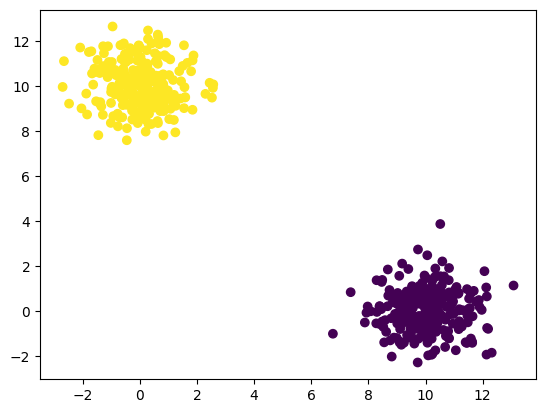

In [25]:
data2 = make_blobs(n_samples=500, n_features=2,centers=[[10,0],[0,10]], cluster_std=1, random_state=42)

X, y = data2
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

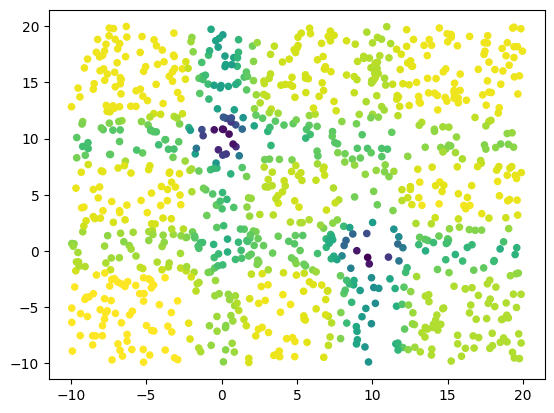

In [27]:
iforest = IForest(contamination=0.02)

iforest.fit(X)

test_data = np.random.uniform(-10,20,(1000, 2))

anomaly_scores_iforest = iforest.decision_function(test_data)

plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_iforest, cmap='viridis', s=20)

In [31]:
dif = DIF(contamination=0.02)
dif.fit(X)
anomaly_scores_dif = dif.decision_function(test_data)

loda = LODA(contamination=0.02)
loda.fit(X)
anomaly_scores_loda = loda.decision_function(test_data)

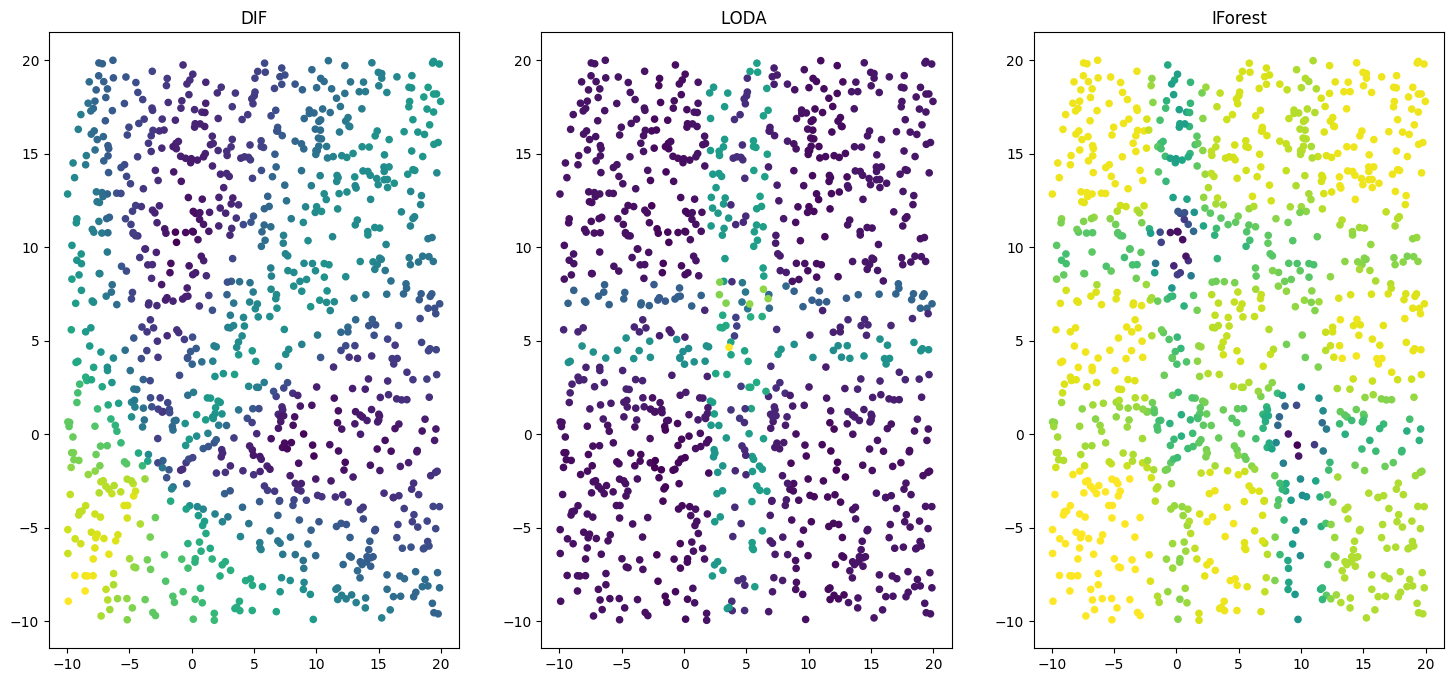

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_dif, cmap='viridis', s=20)
axes[0].set_title('DIF')

axes[1].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_loda, cmap='viridis', s=20)
axes[1].set_title('LODA ')

axes[2].scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_iforest, cmap='viridis', s=20)
axes[2].set_title('IForest')

plt.show()

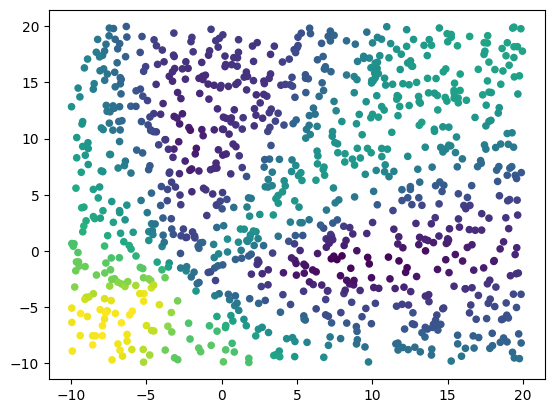

In [ ]:
dif2 = DIF(contamination=0.02, hidden_neurons=[128, 64])
dif2.fit(X)
anomaly_scores_dif2 = dif2.decision_function(test_data)

plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_dif2, cmap='viridis', s=20)

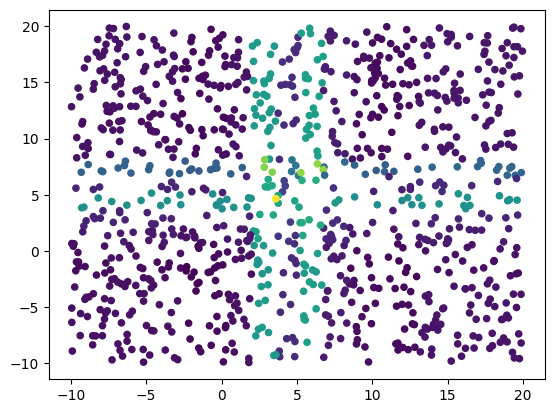

In [ ]:
loda2 = LODA(contamination=0.02, n_bins=50)
loda2.fit(X)

anomaly_scores_loda2 = loda.decision_function(test_data)
plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_scores_loda2, cmap='viridis', s=20)

Ex2 - caz 3D

In [ ]:
data3D = make_blobs(n_samples=500, n_features=3, centers=[[0,10,0],[10,0,10]], cluster_std=1.0, random_state=42)
X, y = data3D

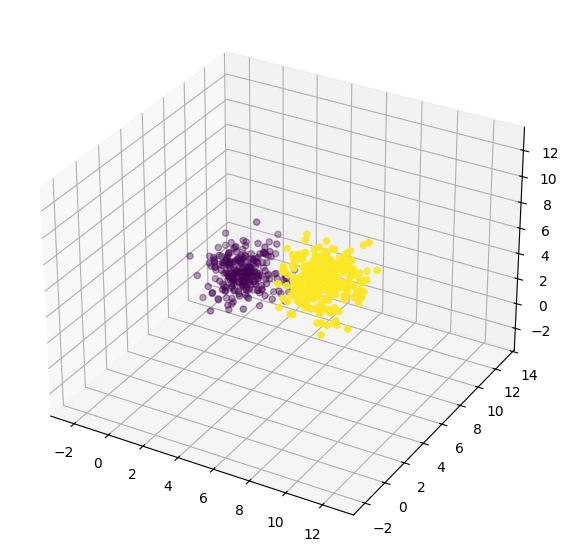

In [44]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

plt.show()